Date: 19.05.2023 \
Author: Reto Hendry

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [50]:
# File paths
file_paths = ["feature_importance_h2o.csv", "feature_importance_pycaret.csv", "feature_importance_tpot.csv"]

# Read and store dataframes
df_list = [pd.read_csv(file) for file in file_paths]

# Rename 'Scaled_Importance' column to include file origin
for df, path in zip(df_list, file_paths):
    df.rename(columns={'Scaled_Importance': 'Scaled_Importance_' + path.split('_')[2].split('.')[0]}, inplace=True)
    df.drop(columns=['Percentage', 'Relative_Importance'], inplace=True)

# Merge dataframes on 'Feature' column
df_merged = df_list[0].merge(df_list[1], on='Feature', how='outer').merge(df_list[2], on='Feature', how='outer')
df_merged

# Add mean of scaled importance
df_merged['Scaled_Importance_Mean'] = df_merged.loc[:,["Scaled_Importance_h2o", "Scaled_Importance_pycaret", "Scaled_Importance_tpot"]].mean(axis=1)

df_merged

,Feature,Scaled_Importance_h2o,Scaled_Importance_pycaret,Scaled_Importance_tpot,Scaled_Importance_Mean
0,16748,0.002234,0.309468,0.218379,0.176694
1,17987,0.008037,0.072295,0.051904,0.044079
2,18756,0.008288,0.068438,0.147108,0.074611
3,16560,0.008501,0.438866,0.125286,0.190885
4,17738,0.013573,0.120949,0.403059,0.179194
...,...,...,...,...,...
65,11105,0.558790,0.570562,0.423696,0.517682
66,6424,0.565678,0.734513,0.524445,0.608212
67,9689,0.685253,1.000000,0.499932,0.728395
68,9720,0.745813,0.534935,0.560653,0.613800


## sorted by mean

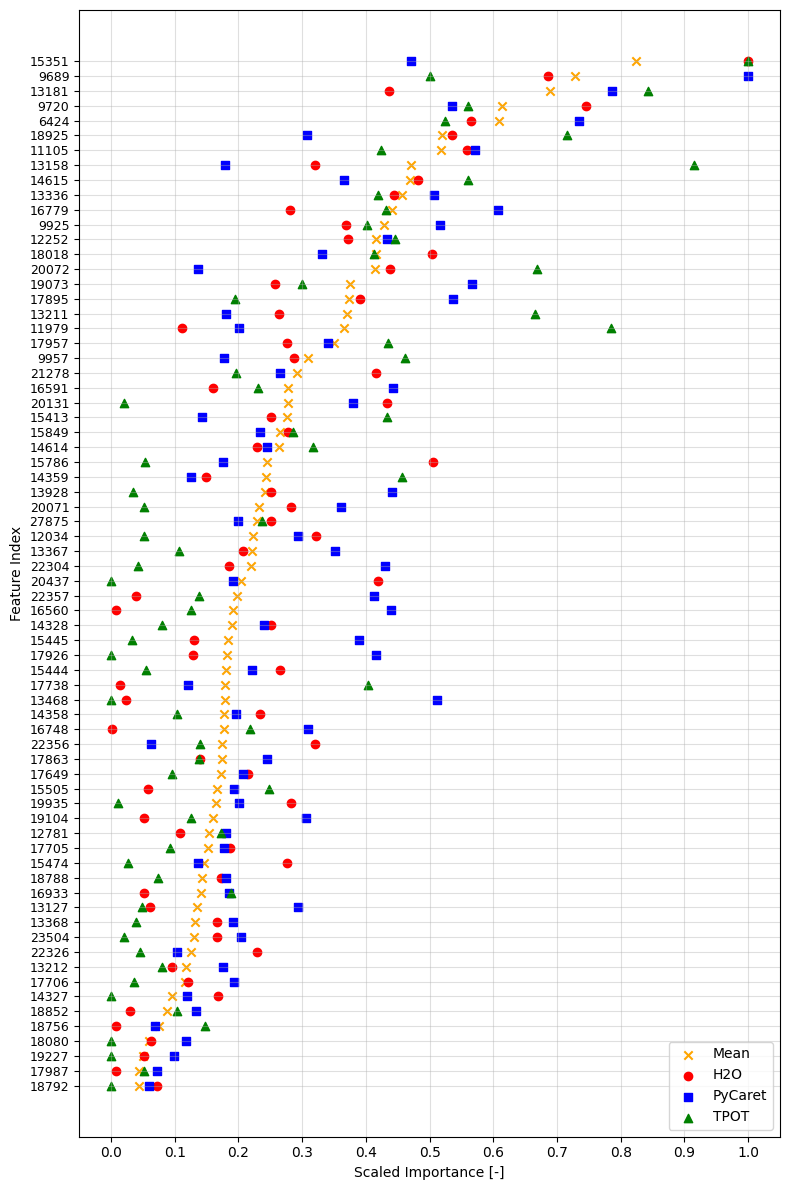

<Figure size 640x480 with 0 Axes>

In [51]:
type = "Mean"

# Sort by mean of scaled importance
df_merged = df_merged.sort_values(by=f'Scaled_Importance_{type}', ascending=True)
df_merged = df_merged.reset_index(drop=True)

# horizontal scatterplot with index on the y axis with matplotlib
fig = plt.figure(figsize=(8, 12))
plt.scatter(df_merged["Scaled_Importance_Mean"], df_merged.index, color="orange", marker="x")
plt.scatter(df_merged["Scaled_Importance_h2o"], df_merged.index, color="red", marker="o")
plt.scatter(df_merged["Scaled_Importance_pycaret"], df_merged.index, color="blue", marker="s")
plt.scatter(df_merged["Scaled_Importance_tpot"], df_merged.index, color="green", marker="^")

# rename every single y ticklabel to the corresponding feature name
plt.yticks(df_merged.index, df_merged.Feature, fontsize=9)
plt.xticks(np.arange(0, 1.01, step=0.1))

# rename the axis ticks to the Feature names
plt.xlabel('Scaled Importance [-]')
plt.ylabel('Feature Index')

plt.legend(labels=['Mean', 'H2O', 'PyCaret', 'TPOT'], loc="lower right")
plt.grid(alpha=0.4)
plt.tight_layout()

# show the graph
plt.show()

# save the graph
plt.savefig(f"../figures/feature_importance_{type}.svg", format="svg", bbox_inches="tight", pad_inches=0.05)

## sorted by tpot

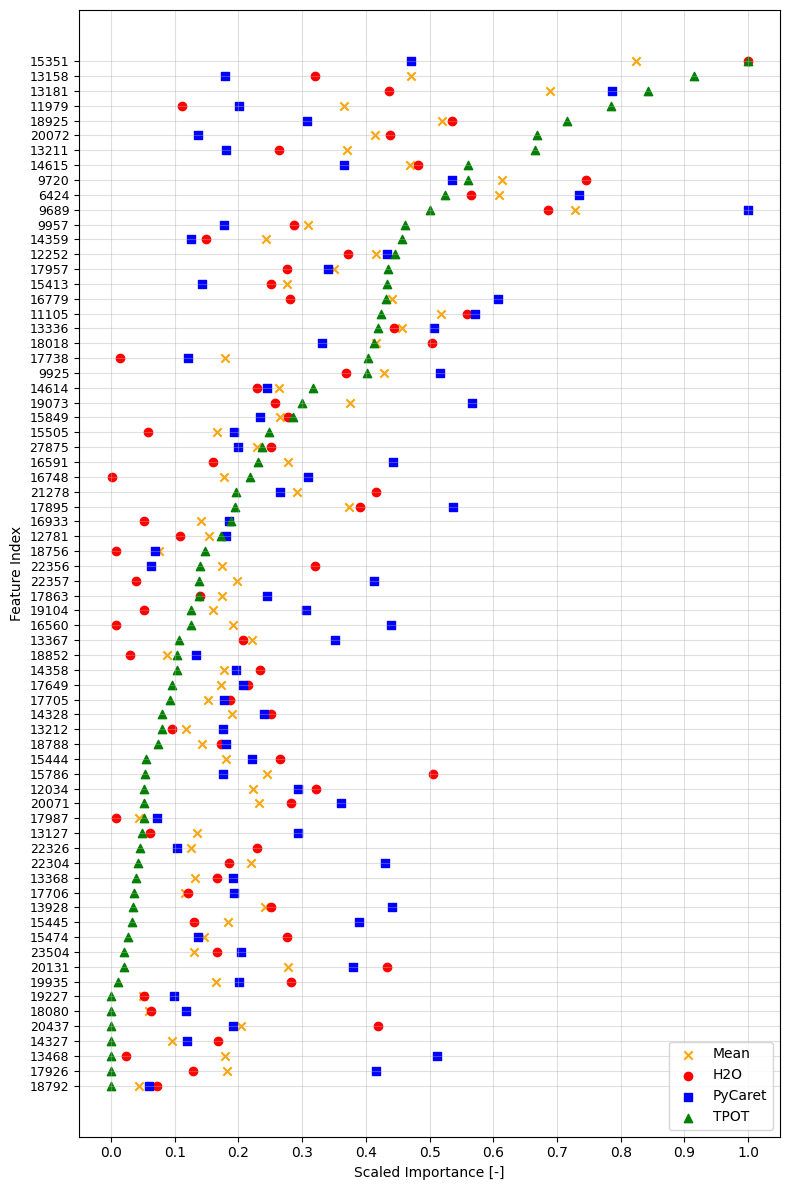

<Figure size 640x480 with 0 Axes>

In [52]:
type = "tpot"

# Sort by mean of scaled importance
df_merged = df_merged.sort_values(by=f'Scaled_Importance_{type}', ascending=True)
df_merged = df_merged.reset_index(drop=True)

# horizontal scatterplot with index on the y axis with matplotlib
fig = plt.figure(figsize=(8, 12))
plt.scatter(df_merged["Scaled_Importance_Mean"], df_merged.index, color="orange", marker="x")
plt.scatter(df_merged["Scaled_Importance_h2o"], df_merged.index, color="red", marker="o")
plt.scatter(df_merged["Scaled_Importance_pycaret"], df_merged.index, color="blue", marker="s")
plt.scatter(df_merged["Scaled_Importance_tpot"], df_merged.index, color="green", marker="^")

# rename every single y ticklabel to the corresponding feature name
plt.yticks(df_merged.index, df_merged.Feature, fontsize=9)
plt.xticks(np.arange(0, 1.01, step=0.1))

# rename the axis ticks to the Feature names
plt.xlabel('Scaled Importance [-]')
plt.ylabel('Feature Index')

plt.legend(labels=['Mean', 'H2O', 'PyCaret', 'TPOT'], loc="lower right")
plt.grid(alpha=0.4)
plt.tight_layout()

# show the graph
plt.show()

# save the graph
plt.savefig(f"../figures/feature_importance_{type}.svg", format="svg", bbox_inches="tight", pad_inches=0.05)

## sorted by h2o

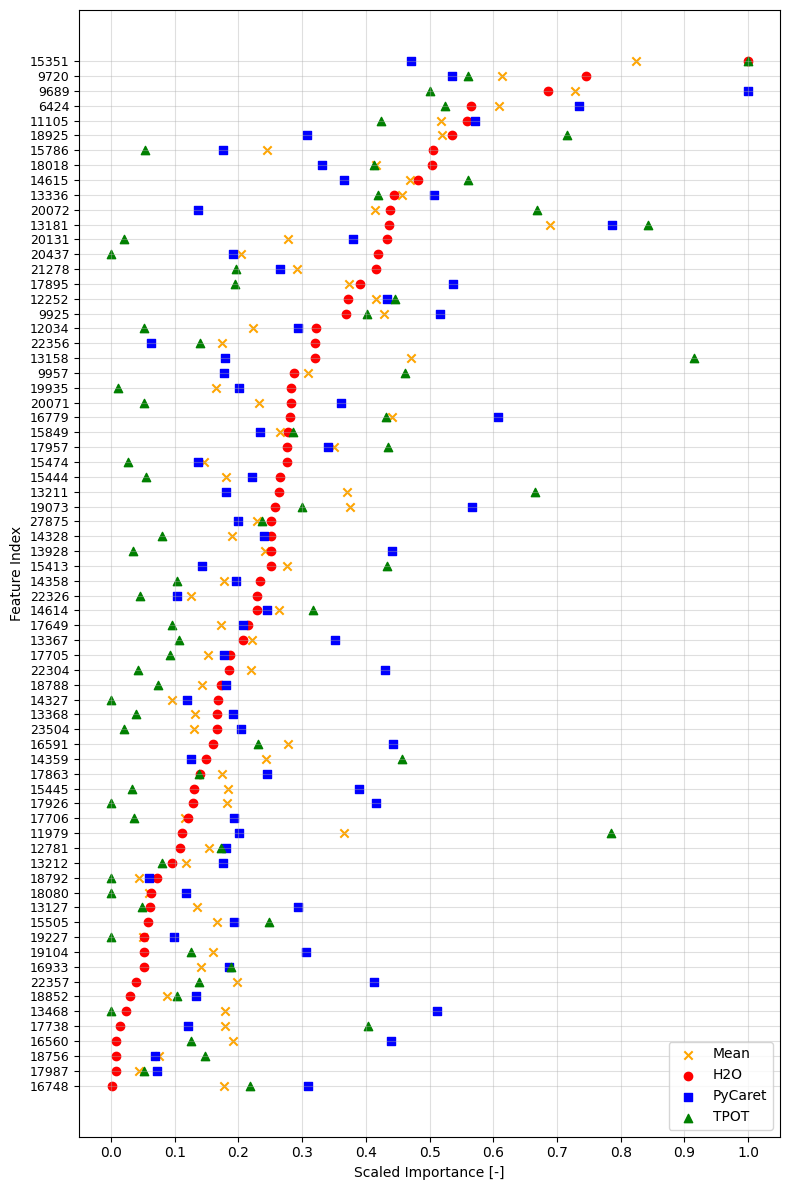

<Figure size 640x480 with 0 Axes>

In [53]:
type = "h2o"

# Sort by mean of scaled importance
df_merged = df_merged.sort_values(by=f'Scaled_Importance_{type}', ascending=True)
df_merged = df_merged.reset_index(drop=True)

# horizontal scatterplot with index on the y axis with matplotlib
fig = plt.figure(figsize=(8, 12))
plt.scatter(df_merged["Scaled_Importance_Mean"], df_merged.index, color="orange", marker="x")
plt.scatter(df_merged["Scaled_Importance_h2o"], df_merged.index, color="red", marker="o")
plt.scatter(df_merged["Scaled_Importance_pycaret"], df_merged.index, color="blue", marker="s")
plt.scatter(df_merged["Scaled_Importance_tpot"], df_merged.index, color="green", marker="^")

# rename every single y ticklabel to the corresponding feature name
plt.yticks(df_merged.index, df_merged.Feature, fontsize=9)
plt.xticks(np.arange(0, 1.01, step=0.1))

# rename the axis ticks to the Feature names
plt.xlabel('Scaled Importance [-]')
plt.ylabel('Feature Index')

plt.legend(labels=['Mean', 'H2O', 'PyCaret', 'TPOT'], loc="lower right")
plt.grid(alpha=0.4)
plt.tight_layout()

# show the graph
plt.show()

# save the graph
plt.savefig(f"../figures/feature_importance_{type}.svg", format="svg", bbox_inches="tight", pad_inches=0.05)

## sorted by pycaret

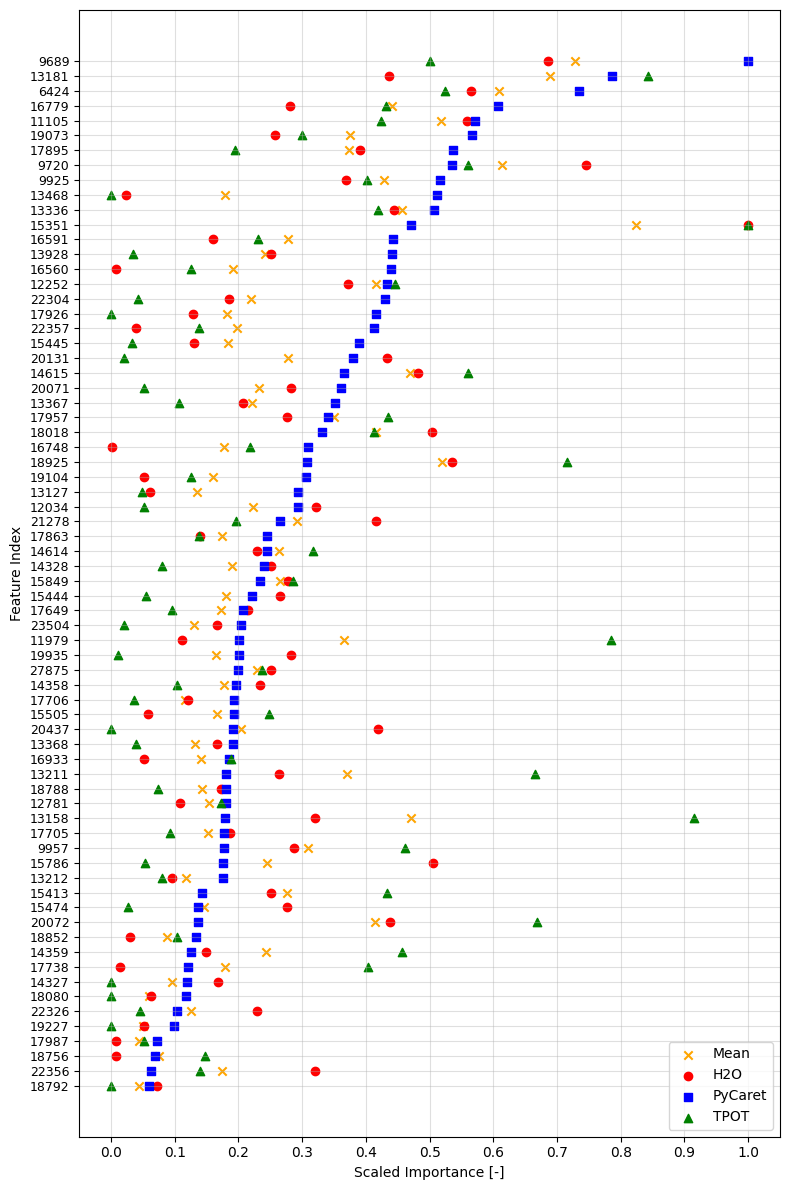

<Figure size 640x480 with 0 Axes>

In [54]:
type = "pycaret"

# Sort by mean of scaled importance
df_merged = df_merged.sort_values(by=f'Scaled_Importance_{type}', ascending=True)
df_merged = df_merged.reset_index(drop=True)

# horizontal scatterplot with index on the y axis with matplotlib
fig = plt.figure(figsize=(8, 12))
plt.scatter(df_merged["Scaled_Importance_Mean"], df_merged.index, color="orange", marker="x")
plt.scatter(df_merged["Scaled_Importance_h2o"], df_merged.index, color="red", marker="o")
plt.scatter(df_merged["Scaled_Importance_pycaret"], df_merged.index, color="blue", marker="s")
plt.scatter(df_merged["Scaled_Importance_tpot"], df_merged.index, color="green", marker="^")

# rename every single y ticklabel to the corresponding feature name
plt.yticks(df_merged.index, df_merged.Feature, fontsize=9)
plt.xticks(np.arange(0, 1.01, step=0.1))

# rename the axis ticks to the Feature names
plt.xlabel('Scaled Importance [-]')
plt.ylabel('Feature Index')

plt.legend(labels=['Mean', 'H2O', 'PyCaret', 'TPOT'], loc="lower right")
plt.grid(alpha=0.4)
plt.tight_layout()

# show the graph
plt.show()

# save the graph
plt.savefig(f"../figures/feature_importance_{type}.svg", format="svg", bbox_inches="tight", pad_inches=0.05)